In [107]:
# Pacotes usados
import pandas as pd # Para pegar os dados dos arquivos
from IPython.display import display # Para mostrar mais de uma informação em uma mesma célula
import ast # Para transformar string/object em estruturas de dados (listas, dicionários, ...)
import numpy as np # Para obter o total de valores por um atributo
from sklearn import linear_model,datasets,svm,tree,neural_network
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, precision_score, recall_score,f1_score
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import VarianceThreshold,SelectKBest,chi2
import matplotlib.pyplot as plt
import seaborn as sns
import math

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
    
import random
random.seed(1001001)


In [4]:
# Carregando dados de cada um dos arquivos
data = pd.read_csv('File/winequality-red.csv',sep=';')
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
#sns.set(style="ticks")
#sns.pairplot(data,hue="quality")
#plt.show()

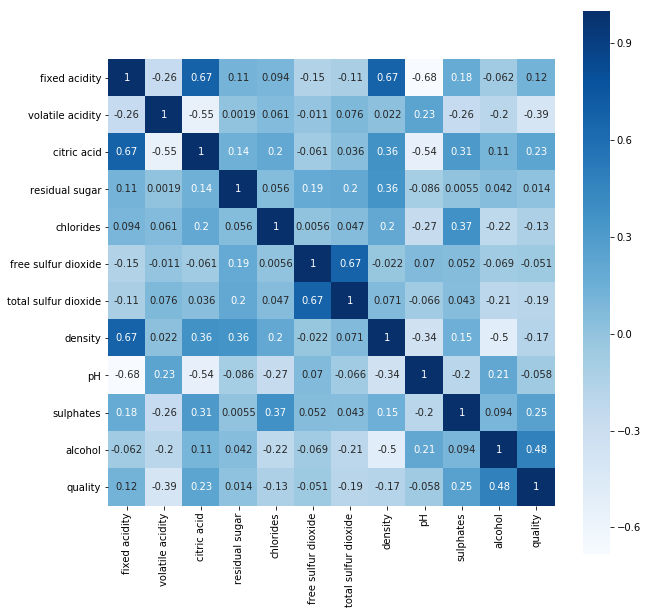

In [6]:
plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),vmax=1,square=True,annot=True,cmap='Blues')
plt.show()

In [7]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
X = data[features]
Y = data['quality']
#sns.pairplot(data,x_vars=features,y_vars='quality',kind='reg',size=7,aspect=0.5)
#plt.show()
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=random.randrange(0,100),test_size=0.25)


In [8]:
def present(x,y,h):
    fig = plt.figure(figsize = (15,15))
    size = len(data.columns)
    for i in range(0,size-1):
        ax = fig.add_subplot(math.ceil(math.sqrt(size-1)), math.ceil(math.sqrt(size-1)), i+1)
        ax.scatter(x.iloc[:,i], y,  color='red')
        ax.scatter(x.iloc[:,i], h, color='blue', linewidth=3)
    plt.show()
    #sns.pairplot(df,x_vars=features,y_vars='quality',kind='reg',size=7,aspect=0.5)
    #plt.show()

In [134]:
def test(regr,X_train,Y_train,X_test,Y_test):
    regr.fit(X_train, Y_train)
    Y_pred = regr.predict(X_test)
    #print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
    #print('Variance score: %.2f' % r2_score(Y_test, Y_pred))
    metrics = {
        'mse': mean_squared_error(Y_test, Y_pred),
        'r2':r2_score(Y_test, Y_pred),
        'accuracy':accuracy_score(Y_test, Y_pred), 
        'precision':precision_score(Y_test, Y_pred, average='macro'), 
        'recall':recall_score(Y_test, Y_pred, average='macro'),
        'f1':f1_score(Y_test, Y_pred, average='macro')
    }
    return Y_pred,metrics#,confusion_matrix

In [171]:
methods = [
        linear_model.LogisticRegressionCV(),
        svm.SVC(),
        linear_model.SGDClassifier(),#(max_iter=1000,tol=1e-3,loss="huber"),
        NearestCentroid(),
        KNeighborsClassifier(n_neighbors=5),
        tree.DecisionTreeClassifier(),
        neural_network.MLPClassifier(solver='lbfgs')
    ]
def test_all(X_train,Y_train,X_test,Y_test):
    metrics = []
    for method in methods:
        #print(method.__class__.__name__)
        #print()
        Y_pred,metric = test(method,X_train,Y_train,X_test,Y_test)
        #print()
        metrics = metrics + [metric]
    return metrics

In [22]:
#Y_pred,_,_ = test(linear_model.LinearRegression(),X_train,Y_train,X_test,Y_test,True)
#present(X_test,Y_test,Y_pred)

In [23]:
#Y_pred,_,_ = test(svm.SVR(),X_train,Y_train,X_test,Y_test)
#present(X_test,Y_test,Y_pred)

In [24]:
#Y_pred,_,_ = test(linear_model.SGDRegressor(max_iter=1000,tol=1e-3),X_train,Y_train,X_test,Y_test)
#Y_pred,_,_ = test(linear_model.SGDRegressor(max_iter=1000,tol=1e-3,loss="epsilon_insensitive"),X_train,Y_train,X_test,Y_test)
#Y_pred,_,_ = test(linear_model.SGDRegressor(max_iter=1000,tol=1e-3,loss="huber"),X_train,Y_train,X_test,Y_test)
#present(X_test,Y_test,Y_pred)

In [25]:
#Y_pred,_,_ = test(NearestCentroid(),X_train,Y_train,X_test,Y_test)
#present(X_test,Y_test,Y_pred)

In [26]:
#Y_pred,_,_ = test(tree.DecisionTreeRegressor(),X_train,Y_train,X_test,Y_test)
#present(X_test,Y_test,Y_pred)

In [27]:
#Y_pred,_,_ = test(neural_network.MLPRegressor(solver='lbfgs'),X_train,Y_train,X_test,Y_test)
#present(X_test,Y_test,Y_pred)

Mean squared error: 0.71
Variance score: -0.08
Mean squared error: 0.78
Variance score: -0.18
Mean squared error: 0.83
Variance score: -0.26
Mean squared error: 0.72
Variance score: -0.10
Mean squared error: 0.67
Variance score: -0.01
Mean squared error: 0.71
Variance score: -0.08
Mean squared error: 0.70
Variance score: -0.07
Mean squared error: 0.76
Variance score: -0.15
Mean squared error: 0.71
Variance score: -0.08
Mean squared error: 0.71
Variance score: -0.08
Mean squared error: 0.67
Variance score: -0.02


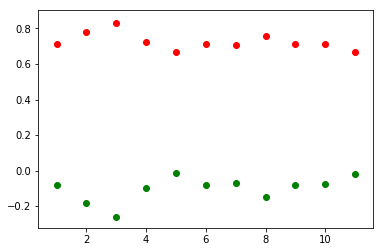

In [19]:
es = []
ss = []
xs = list(range(1,12))
for i in xs:
    Y_pred,e,s = test(KNeighborsClassifier(n_neighbors=i),X_train,Y_train,X_test,Y_test)
    es += [e]
    ss += [s]
plt.scatter(xs, es,  color='red')
plt.scatter(xs, ss,  color='green')
plt.show()
#present(X_test,Y_test,Y_pred)

In [20]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
X = data[features]
Y = data['quality']
#sns.pairplot(data,x_vars=features,y_vars='quality',kind='reg',size=7,aspect=0.5)
#plt.show()


In [21]:
X = data[features]
print(np.shape(X))
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X1 = sel.fit_transform(X)
print(np.shape(X1))
X2 = SelectKBest(chi2, k=2).fit_transform(X, Y)
print(np.shape(X2))
X3 = SelectKBest(chi2, k=5).fit_transform(X, Y)
print(np.shape(X3))
#sns.pairplot(data,x_vars=features,y_vars='quality',kind='reg',size=7,aspect=0.5)
#plt.show()

(1599, 11)
(1599, 5)
(1599, 2)
(1599, 5)


In [66]:
rand = random.randrange(0,100)
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y,random_state=rand,test_size=0.25)
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X2,Y,random_state=rand,test_size=0.25)
X3_train,X3_test,Y3_train,Y3_test=train_test_split(X3,Y,random_state=rand,test_size=0.25)

In [67]:
metric0 = test_all(X_train,Y_train,X_test,Y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [68]:
metric1 = test_all(X1_train,Y1_train,X1_test,Y1_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [69]:
metric2 = test_all(X2_train,Y2_train,X2_test,Y2_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [70]:
metric3 = test_all(X3_train,Y3_train,X3_test,Y3_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [174]:
metric_results = [
    test_all(X_train,Y_train,X_test,Y_test),
    test_all(X1_train,Y1_train,X1_test,Y1_test),
    test_all(X2_train,Y2_train,X2_test,Y2_test),
    test_all(X3_train,Y3_train,X3_test,Y3_test)
]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [173]:
tabelascores = pd.DataFrame(data={'no filtering':score0,'variance (80%)':score1,'chi2 k = 2':score2,'chi2 k =5':score3},
                      index=[method.__class__.__name__ for method in methods])


def color_negative_red(val):
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]


#tabelascores.style.applymap(color_negative_red).apply(highlight_max)

In [172]:
tabelaerros = pd.DataFrame(data={'no filtering':error0,'variance (80%)':error1,'chi2 k = 2':error2,'chi2 k =5':error3},
                      index=[method.__class__.__name__ for method in methods])


def color_big_red(val):
    color = 'red' if val > 1 else 'black'
    return 'color: %s' % color

def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_min]


#tabelaerros.style.applymap(color_big_red).apply(highlight_min)

In [160]:
def show(metric,views):
    data = {
        'no filtering':[x[metric] for x in metric_results[0]], 
        'variance (80%)':[x[metric] for x in metric_results[1]],
        'chi2 k = 2':[x[metric] for x in metric_results[2]],
        'chi2 k =5':[x[metric] for x in metric_results[3]]
    }
    tabela = pd.DataFrame(data=data,index=[method.__class__.__name__ for method in methods])
    printmd('# '+ metric)
    return tabela.style.applymap(views[0]).apply(views[1]).apply(views[2], axis=None)


In [163]:
def color_big_red(val):
    color = 'red' if val > 1 else 'black'
    return 'color: %s' % color

def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_min]
def color_negative_red(val):
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

def highlight_total_max(data):
    attr = 'background-color: {}'.format('cyan')
    is_max = data == data.max().max()
    return pd.DataFrame(np.where(is_max, attr, ''),index=data.index, columns=data.columns)

def highlight_total_min(data):
    attr = 'background-color: {}'.format('cyan')
    is_min = data == data.min().min()
    return pd.DataFrame(np.where(is_min, attr, ''),index=data.index, columns=data.columns)

metrics_show = {
        'mse': (color_big_red,highlight_min,highlight_total_min),
        'r2':(color_negative_red,highlight_max,highlight_total_max),
        'accuracy':(color_negative_red,highlight_max,highlight_total_max), 
        'precision':(color_negative_red,highlight_max,highlight_total_max), 
        'recall':(color_negative_red,highlight_max,highlight_total_max),
        'f1':(color_negative_red,highlight_max,highlight_total_max)
}
metrics_show_keys = list(metrics_show.keys())
metrics_show_values = list(metrics_show.values())
def show_metric(i):
    return show(metrics_show_keys[i],metrics_show_values[i])

In [175]:
show_metric(0)

# mse

,chi2 k = 2,chi2 k =5,no filtering,variance (80%)
LogisticRegressionCV,0.745,0.585,0.5675,0.63
SVC,0.79,0.61,0.595,0.615
SGDClassifier,1.415,0.725,5.615,2.9625
NearestCentroid,4.2725,4.295,4.295,4.295
KNeighborsClassifier,0.9175,0.7175,0.6675,0.6525
DecisionTreeClassifier,1.0775,0.6875,0.76,0.6525
MLPClassifier,0.72,0.6025,0.5575,0.6975


In [176]:
show_metric(1)

# r2

,chi2 k = 2,chi2 k =5,no filtering,variance (80%)
LogisticRegressionCV,-0.130544,0.112258,0.138814,0.0439698
SVC,-0.198832,0.07432,0.0970826,0.0667324
SGDClassifier,-1.14727,-0.100193,-7.52081,-3.49562
NearestCentroid,-5.48355,-5.5177,-5.5177,-5.5177
KNeighborsClassifier,-0.392314,-0.0888122,-0.0129368,0.00982587
DecisionTreeClassifier,-0.635115,-0.0432869,-0.153306,0.00982587
MLPClassifier,-0.0926059,0.0857013,0.153989,-0.058462


In [177]:
show_metric(2)

# accuracy

,chi2 k = 2,chi2 k =5,no filtering,variance (80%)
LogisticRegressionCV,0.5025,0.5675,0.5775,0.5675
SVC,0.52,0.5725,0.61,0.6025
SGDClassifier,0.41,0.4725,0.1275,0.265
NearestCentroid,0.27,0.2675,0.2675,0.2675
KNeighborsClassifier,0.5125,0.5575,0.545,0.5525
DecisionTreeClassifier,0.54,0.5775,0.5825,0.625
MLPClassifier,0.5075,0.5525,0.5675,0.5275


In [178]:
show_metric(3)

# precision

,chi2 k = 2,chi2 k =5,no filtering,variance (80%)
LogisticRegressionCV,0.176432,0.190602,0.268698,0.189444
SVC,0.224789,0.280957,0.307391,0.325933
SGDClassifier,0.171131,0.193598,0.197931,0.127049
NearestCentroid,0.219004,0.179535,0.179535,0.179535
KNeighborsClassifier,0.222982,0.283826,0.260306,0.266078
DecisionTreeClassifier,0.261629,0.332676,0.329339,0.380292
MLPClassifier,0.184564,0.189757,0.262823,0.222823


In [179]:
show_metric(4)

# recall

,chi2 k = 2,chi2 k =5,no filtering,variance (80%)
LogisticRegressionCV,0.202859,0.226016,0.259494,0.225487
SVC,0.219161,0.24837,0.272986,0.274208
SGDClassifier,0.159632,0.195453,0.210188,0.172713
NearestCentroid,0.235434,0.231888,0.231888,0.231888
KNeighborsClassifier,0.220912,0.266605,0.241177,0.246728
DecisionTreeClassifier,0.253146,0.352359,0.341579,0.345564
MLPClassifier,0.206053,0.220794,0.248315,0.213644


In [180]:
show_metric(5)

# f1

,chi2 k = 2,chi2 k =5,no filtering,variance (80%)
LogisticRegressionCV,0.182974,0.206121,0.259198,0.205609
SVC,0.213757,0.247647,0.275936,0.281057
SGDClassifier,0.159672,0.162178,0.114678,0.141749
NearestCentroid,0.130593,0.124122,0.124122,0.124122
KNeighborsClassifier,0.217248,0.270725,0.242704,0.248682
DecisionTreeClassifier,0.256698,0.341326,0.332902,0.355624
MLPClassifier,0.184045,0.202561,0.247109,0.199161
